## Scipy Root finding and Solver

If you try to find a  x  such that
f(x)=0
 
then this is called root finding. Note that problems like  g(x)=h(x)  fall in this category as you can rewrite them as  f(x)=g(x)−h(x)=0 .

A number of root finding tools are available in scipy’s optimize module

### Root finding using the `bisection` method

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html

<img src ="Pic_data/bisect.png" width = 300 >

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy.optimize import bisect

def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    fx = x ** 3 - 2 * x ** 2
    
    return fx


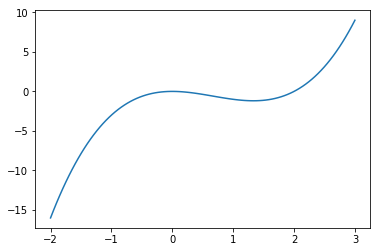

In [23]:
# Plotting to observe the function
x = np.linspace(-2, 3, 100)
y = f(x)
plt.plot(x,y)

In [36]:

# main program starts here

root = bisect(f, -2, 3) # (function, lower_bound, upper_bound)

print('root of the function = %.16f'%(root))

root of the function = 1.9999999999997726


### Root finding using the `fsolve` funcion

A (often) better (in the sense of “more efficient”) algorithm than the bisection algorithm is implemented in the general purpose `fsolve()` function for root finding of (multidimensional) functions. This algorithm needs only one starting point close to the suspected location of the root (but is not garanteed to converge).

https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.optimize.fsolve.html

In [45]:
from scipy.optimize import fsolve

def f(x):
    return x ** 3 - 2 * x ** 2


In [145]:
root = fsolve(f, 0.5, xtol = 1e-2)           # one root is at x=2.0

print('root of the function = %.16f'%(root))

root of the function = 0.0000000000000000


C:\Users\PeerapongE\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


### Multi-dimensional problem

http://folk.uio.no/inf3330/scripting/doc/python/SciPy/tutorial/old/node18.html

In [187]:
def equation(xpack):
    
    x0   = xpack[0]
    x1   = xpack[1]
    
    out = []
    out.append(x0*x1 - 4)
    out.append(x0*x1 - x1 - 5)
    
    return (out) # must be the same size as number of variable to be solved

In [189]:
# Result might depends on starting point

x1, x2 = fsolve(equation, (0,0) )

print(x1)
print(x2)

-4.000000000000011
-1.0000000000000002


### Gradient-based Optimization

In [194]:
from scipy.optimize import fmin

#### Single Variable

In [200]:
def f(x):
    return (x - 5) ** 2

In [203]:
fmin(f, 0 )

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 29
         Function evaluations: 58


array([5.])

#### Multiple Variable

In [198]:
def f(x):
    return (x[0]-5) ** 2 + (x[1]-10)**2

In [199]:
fmin(f, (1,2))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 56
         Function evaluations: 111


array([ 5.00000658, 10.00001616])

#### How it work? Inside the optimization algorithm

In [205]:
from scipy import arange, cos, exp
from scipy.optimize import fmin

def f(x):
    return cos(x) - 3 * exp( -(x - 0.2) ** 2)

In [206]:
# find minima of f(x),
# starting from 1.0 and 2.0 respectively
minimum1 = fmin(f, 1.0)
print("Start search at x=1., minimum is", minimum1)
minimum2 = fmin(f, 2.0)
print("Start search at x=2., minimum is", minimum2)

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 16
         Function evaluations: 32
Start search at x=1., minimum is [0.23964844]
Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 16
         Function evaluations: 32
Start search at x=2., minimum is [3.13847656]


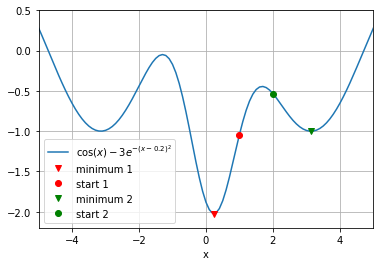

In [207]:
import pylab

# plot function
x = arange(-10, 10, 0.1)
y = f(x)

pylab.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$')
pylab.xlabel('x')
pylab.grid()
pylab.axis([-5, 5, -2.2, 0.5])

# add minimum1 to plot
pylab.plot(minimum1, f(minimum1), 'vr',
           label='minimum 1')
# add start1 to plot
pylab.plot(1.0, f(1.0), 'or', label='start 1')

# add minimum2 to plot
pylab.plot(minimum2,f(minimum2),'vg',\
           label='minimum 2')
# add start2 to plot
pylab.plot(2.0,f(2.0),'og',label='start 2')

pylab.legend(loc='lower left')